In [28]:
import pandas as pd
import numpy as np
from tabulate import tabulate

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data_train = pd.read_csv("./data/train.csv")
data_train

data_train.Cabin = data_train.Cabin.str.extract('([A-Z])\d+', expand=False)
data_train.Cabin.fillna('S', inplace=True)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,S,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,S,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,S,C


In [8]:
data_train.info()
# 得知各个信息类型， 且知道 age 和 cabin 信息不全

data_train[cabin]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data_train.describe()
# 数值型类型的指标

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


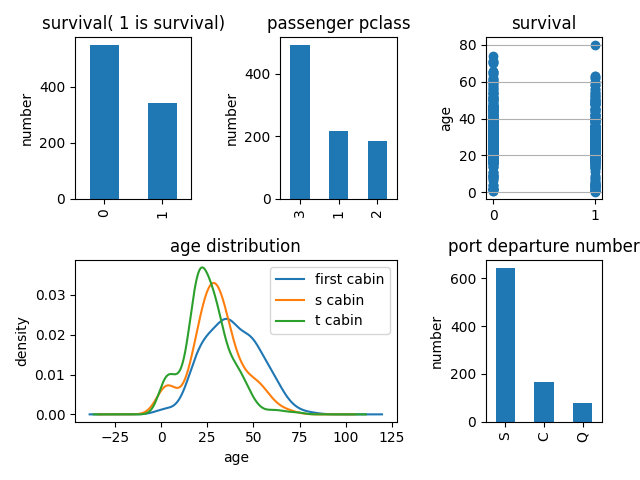

In [10]:
# coding=utf-8
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set(alpha=0.5)  

plt.subplot2grid((2,3),(0,0))            
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"survival( 1 is survival)")
plt.ylabel(u"number")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"number")
plt.title(u"passenger pclass")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"age")                        
plt.grid(b=True, which='major', axis='y') 
plt.title(u"survival")


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")
plt.ylabel(u"density") 
plt.title(u"age distribution")
plt.legend((u'first cabin', u's cabin',u't cabin'),loc='best') 


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"port departure number")
plt.ylabel(u"number")  

plt.tight_layout()



<IPython.core.display.Javascript object>


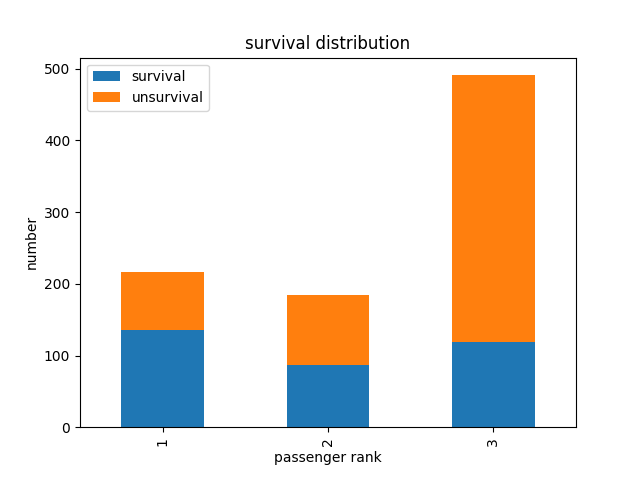

In [11]:

df=pd.DataFrame({u'survival':data_train.Pclass[data_train.Survived == 1].value_counts(), u'unsurvival':data_train.Pclass[data_train.Survived == 0].value_counts()})
df.plot(kind='bar', stacked=True)
plt.title(u"survival distribution")
plt.xlabel(u"passenger rank") 
plt.ylabel(u"number") 


<IPython.core.display.Javascript object>


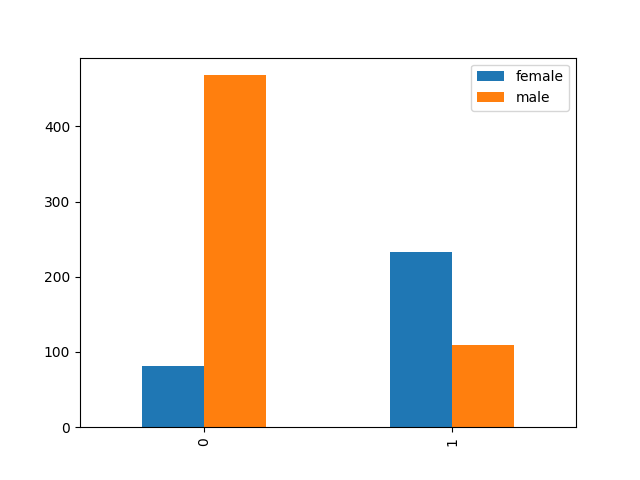

In [12]:
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar')

<IPython.core.display.Javascript object>


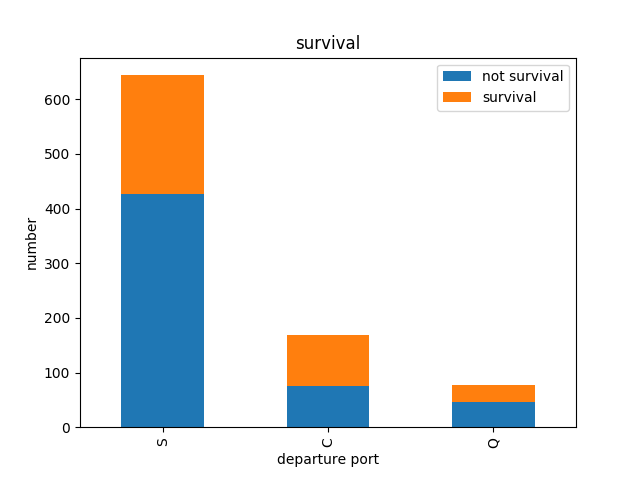

In [13]:
# departure port
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survival':Survived_1, u'not survival':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"survival")
plt.xlabel(u"departure port") 
plt.ylabel(u"number") 

In [14]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [15]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [16]:
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
F33                3
E101               3
D                  3
C22 C26            3
B20                2
B5                 2
F4                 2
C78                2
B77                2
B57 B59 B63 B66    2
C93                2
E24                2
B28                2
D33                2
C2                 2
B35                2
C92                2
E8                 2
D26                2
C126               2
C123               2
E25                2
B18                2
C125               2
C83                2
B49                2
E33                2
C124               2
C52                2
B58 B60            2
E121               2
D17                2
D35                2
C68                2
C65                2
D20                2
F G73              2
E44                2
D36                2
B51 B53 B55        2
E67                2
B22                2
C106               1
E34          

<IPython.core.display.Javascript object>


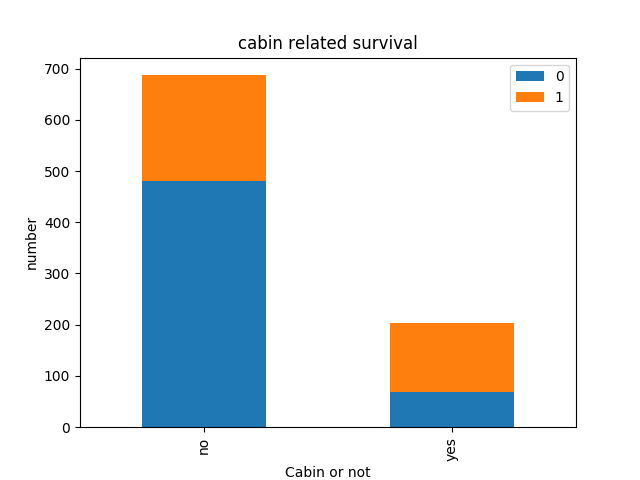

In [21]:
Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'yes':Survived_cabin, u'no':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"cabin related survival")
plt.xlabel(u"Cabin or not") 
plt.ylabel(u"number")

plt.show()

<IPython.core.display.Javascript object>


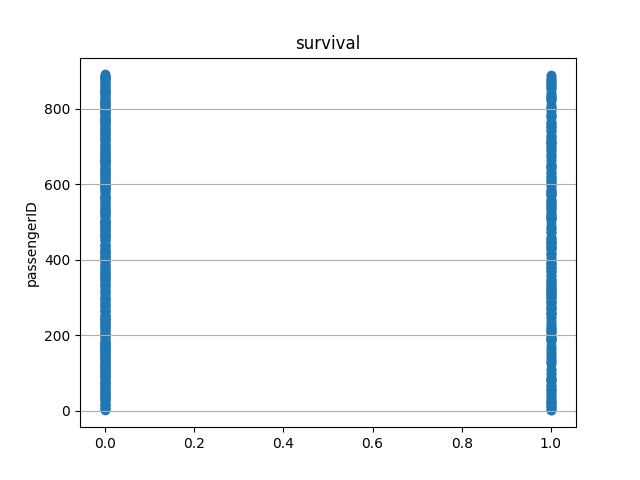

In [23]:
plt.figure()
plt.scatter(data_train.Survived, data_train.PassengerId)
plt.ylabel(u"passengerID")                        
plt.grid(b=True, which='major', axis='y') 
plt.title(u"survival")



<IPython.core.display.Javascript object>


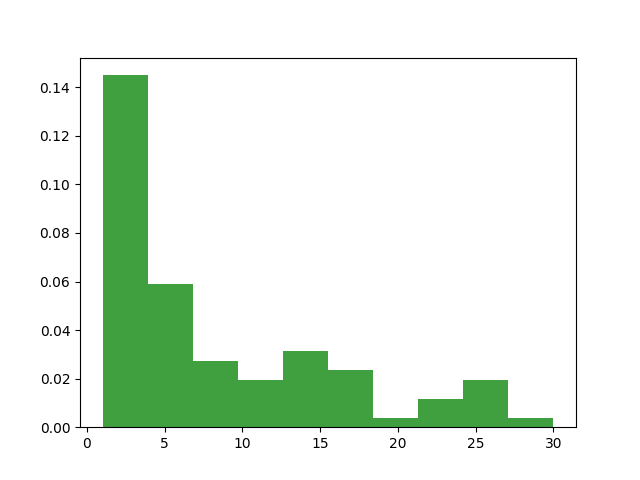

In [170]:
# 以下开始特征工程的处理
fig2 = plt.figure()
# from sklearn.ensemble import RandomForestRegressor
x = data_train.Age.value_counts()
n, bins, patches = plt.hist(x, normed=1, facecolor='g', alpha=0.75)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    # y即目标年龄
    y = known_age[:, 0]
    # X即特征属性值
    X = known_age[:, 1:]
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

<IPython.core.display.Javascript object>


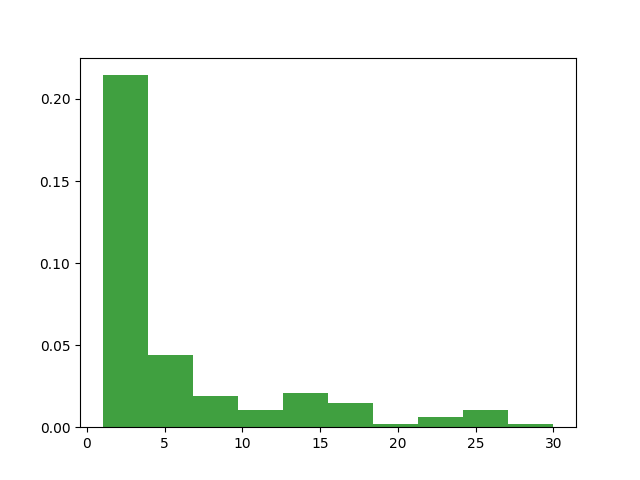

count    891.000000
mean      29.647248
std       13.629879
min        0.420000
25%       21.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [183]:
# 以下开始特征工程的处理


# 1. 随机森林填补年龄
plt.figure()
# from sklearn.ensemble import RandomForestRegressor
x = data_train.Age.value_counts()
print(data_train.Age.describe())
n, bins, patches = plt.hist(x, normed=1, facecolor='g', alpha=0.75)
plt.show()

In [208]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      23.838953
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     32.066493
18     31.000000
19     29.518205
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.518205
27     19.000000
28     22.380113
29     27.947206
30     40.000000
31     36.108048
32     35.295824
33     66.000000
34     28.000000
35     42.000000
36     22.876307
37     21.000000
38     18.000000
39     14.000000
40     40.000000
41     27.000000
42     27.947206
43      3.000000
44     19.000000
45     30.705727
46     33.128985
47     35.295824
48     23.459683
49     18.000000
50      7.000000
51     21.000000
52     49.000000
53     29.000000
54     65.000000
55     44.064830
56     21.000000
57     28.500000
58      5.0000

In [262]:
import sklearn.preprocessing as preprocessing

age = np.array(df['Age']).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(age)
data_train['Age_scaled'] = scaler.transform(age)

fare = np.array(df['Fare']).reshape(-1, 1)
scaler = preprocessing.StandardScaler().fit(fare)
df['Fare_scaled'] = scaler.transform(fare)
df.drop(['Age', 'Fare'], axis=1, inplace=True)
df

,PassengerId,Survived,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Fare_scaled
0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,-0.502445
1,2,1,1,0,0,1,1,0,0,1,0,1,0,0,0.786845
2,3,1,0,0,1,0,0,0,1,1,0,0,0,1,-0.488854
3,4,1,1,0,0,1,0,0,1,1,0,1,0,0,0.420730
4,5,0,0,0,1,0,0,0,1,0,1,0,0,1,-0.486337
5,6,0,0,0,1,0,0,1,0,0,1,0,0,1,-0.478116
6,7,0,0,0,0,1,0,0,1,0,1,1,0,0,0.395814
7,8,0,3,1,1,0,0,0,1,0,1,0,0,1,-0.224083
8,9,1,0,2,1,0,0,0,1,1,0,0,0,1,-0.424256
9,10,1,1,0,1,0,1,0,0,1,0,0,1,0,-0.042956


In [272]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()
y = train_np[:, 0]
X = train_np[:, 1:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [47]:
data_test = pd.read_csv("./data/test.csv")
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [44]:
data_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [45]:
data_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [46]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


array([[ 0.,  0.,  3.],
       [ 0.,  0.,  1.],
       [ 0.,  2.,  3.],
       [ 2.,  1.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  2.],
       [ 0.,  1.,  3.],
       [ 0.,  0.,  2.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  2.],
       [ 0.,  1.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  1.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  2.,  3.],
       [ 4.,  0.,  3.],
       [ 0.,  1.,  3.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 2.,  8.,  3.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  3.],
       [ 0.,  0.,  3.],
       [ 0.,  0.

In [66]:
def processFeatures(data):
  # source = data.loc[:, ['Pclass', 'SibSp', 'Parch', 'Fare']]
  source = data

  dummies_embarked = pd.get_dummies(source['Embarked'], prefix= 'Embarked')
#   dummies_sex = pd.get_dummies(source['Sex'], prefix= 'Sex')
  source = pd.concat([source, dummies_embarked], axis=1)

  source['Sex'] = source['Sex'].map(lambda x : 1 if x == 'male' else 0 )

  source = set_missing_ages(source, ['Age', 'Parch', 'SibSp', 'Pclass'], 'Age')
  source = set_missing_ages(source, ['Fare', 'Parch', 'SibSp', 'Pclass'], 'Fare')
  return source.filter(regex='Age|SibSp|Parch|Fare|Embarked_.*|Sex|Pclass')

def set_missing_ages(df, features, target):
  target_df = df[features]
  known = target_df[target_df[target].notnull()].as_matrix()
  unknown = target_df[target_df[target].isnull()].as_matrix()
  y = known[:, 0]
  X = known[:, 1:]
  rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
  rfr.fit(X, y)
  predicted = rfr.predict(unknown[:, 1::])
  df.loc[ (df[target].isnull()), target ] = predicted
  return df

targetX = processFeatures(data_test)
data_train.SibSp

0      1
1      1
2      0
3      1
4      0
5      0
6      0
7      3
8      0
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     4
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     3
25     1
26     0
27     3
28     0
29     0
30     0
31     1
32     0
33     0
34     1
35     1
36     0
37     0
38     2
39     1
40     1
41     1
42     0
43     1
44     0
45     0
46     1
47     0
48     2
49     1
50     4
51     0
52     1
53     1
54     0
55     0
56     0
57     0
58     1
59     5
60     0
61     0
62     1
63     3
64     0
65     1
66     0
67     0
68     4
69     2
70     0
71     5
72     0
73     1
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     3
86     1
87     0
88     3
89     0
90     0
91     0
92     1
93     1
94     0
95     0
96     0
97     0
98     0
99     1
100    0
101    0
102    0
103    0
104    2
105    0
106    0
107    0
108    0
109    1
110    0
1

In [67]:
data_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

0            Mr
1           Mrs
2          Miss
3           Mrs
4            Mr
5            Mr
6            Mr
7        Master
8           Mrs
9           Mrs
10         Miss
11         Miss
12           Mr
13           Mr
14         Miss
15          Mrs
16       Master
17           Mr
18          Mrs
19          Mrs
20           Mr
21           Mr
22         Miss
23           Mr
24         Miss
25          Mrs
26           Mr
27           Mr
28         Miss
29           Mr
30          Don
31          Mrs
32         Miss
33           Mr
34           Mr
35           Mr
36           Mr
37           Mr
38         Miss
39         Miss
40          Mrs
41          Mrs
42           Mr
43         Miss
44         Miss
45           Mr
46           Mr
47         Miss
48           Mr
49          Mrs
50       Master
51           Mr
52          Mrs
53          Mrs
54           Mr
55           Mr
56         Miss
57           Mr
58         Miss
59       Master
60           Mr
61         Miss
62      

In [6]:
data_train.drop('PassengerId', axis=1, inplace=True)
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [7]:
from sklearn.preprocessing import LabelEncoder
data_train['Sex'] = LabelEncoder().fit_transform(data_train['Sex'])
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,NaN,C
